In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

In [51]:
af=pd.read_csv(r'C:\Users\KeLi2\Downloads\paper\paper\fars数据\csv2017\trippub.csv')

In [52]:
af1=af.loc[:,['HOUSEID','HHVEHCNT','URBRUR','TRPTRANS','TRPMILAD','WTTRDFIN','PSGR_FLG','TRVLCMIN','TRPHHVEH','R_AGE_IMP','WHYTRP1S']]

In [53]:
af2=af1[(af1['TRPMILAD']>=0) & (af1['TRPMILAD']<=75.)]
af3=af2[(af2['TRVLCMIN']>0)&(af2['TRVLCMIN']<=150)]
af4=af3[af3['TRPTRANS']>0]
af4.loc[(af4['TRPTRANS'] >= 3) & (af4['TRPTRANS'] <= 9), 'TRPTRANS'] = 3
af4.loc[(af4['TRPTRANS'] >= 11) & (af4['TRPTRANS'] <= 18), 'TRPTRANS'] = 4
af4.loc[af4['TRPTRANS'] == 10, 'TRPTRANS'] = 5
af4.loc[af4['TRPTRANS'] >= 19, 'TRPTRANS'] = 6
af4.loc[af4['WHYTRP1S']==1,'WHYTRP1S']=1
af4.loc[af4['WHYTRP1S']==10,'WHYTRP1S']=2
af4.loc[af4['WHYTRP1S']==20,'WHYTRP1S']=3
af4.loc[af4['WHYTRP1S']==30,'WHYTRP1S']=4
af4.loc[af4['WHYTRP1S']==40,'WHYTRP1S']=5
af4.loc[af4['WHYTRP1S']==50,'WHYTRP1S']=6
af4.loc[af4['WHYTRP1S']==70,'WHYTRP1S']=7
af4.loc[af4['WHYTRP1S']==80,'WHYTRP1S']=8
af4.loc[af4['WHYTRP1S']==97,'WHYTRP1S']=9
af4


,HOUSEID,HHVEHCNT,URBRUR,TRPTRANS,TRPMILAD,WTTRDFIN,PSGR_FLG,TRVLCMIN,TRPHHVEH,R_AGE_IMP,WHYTRP1S
0,30000007,5,1,3,5.847584,75441.90580,2,15,1,67,3
1,30000007,5,1,3,5.741650,75441.90580,2,20,1,67,1
4,30000007,5,1,3,2.508975,80122.68674,2,15,1,28,3
5,30000007,5,1,3,2.501169,80122.68674,2,15,1,28,1
6,30000008,4,2,3,8.606250,23062.85743,2,15,1,55,2
...,...,...,...,...,...,...,...,...,...,...,...
923567,50515573,0,1,1,1.168000,223357.45740,-1,27,2,52,2
923568,50515573,0,1,1,0.238000,223357.45740,-1,8,2,52,6
923569,50515573,0,1,1,0.238000,223357.45740,-1,5,2,52,2
923570,50515573,0,1,1,0.867000,223357.45740,-1,25,2,52,5


In [54]:
title=['Home','work','School','Medical','Shopping','Recreational','Transport someone','meals','others']
title[0]

'Home'

C:\Users\KeLi2\AppData\Local\Temp\ipykernel_16664\1693244916.py:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i)


Text(0.5, 0.98, 'H1')

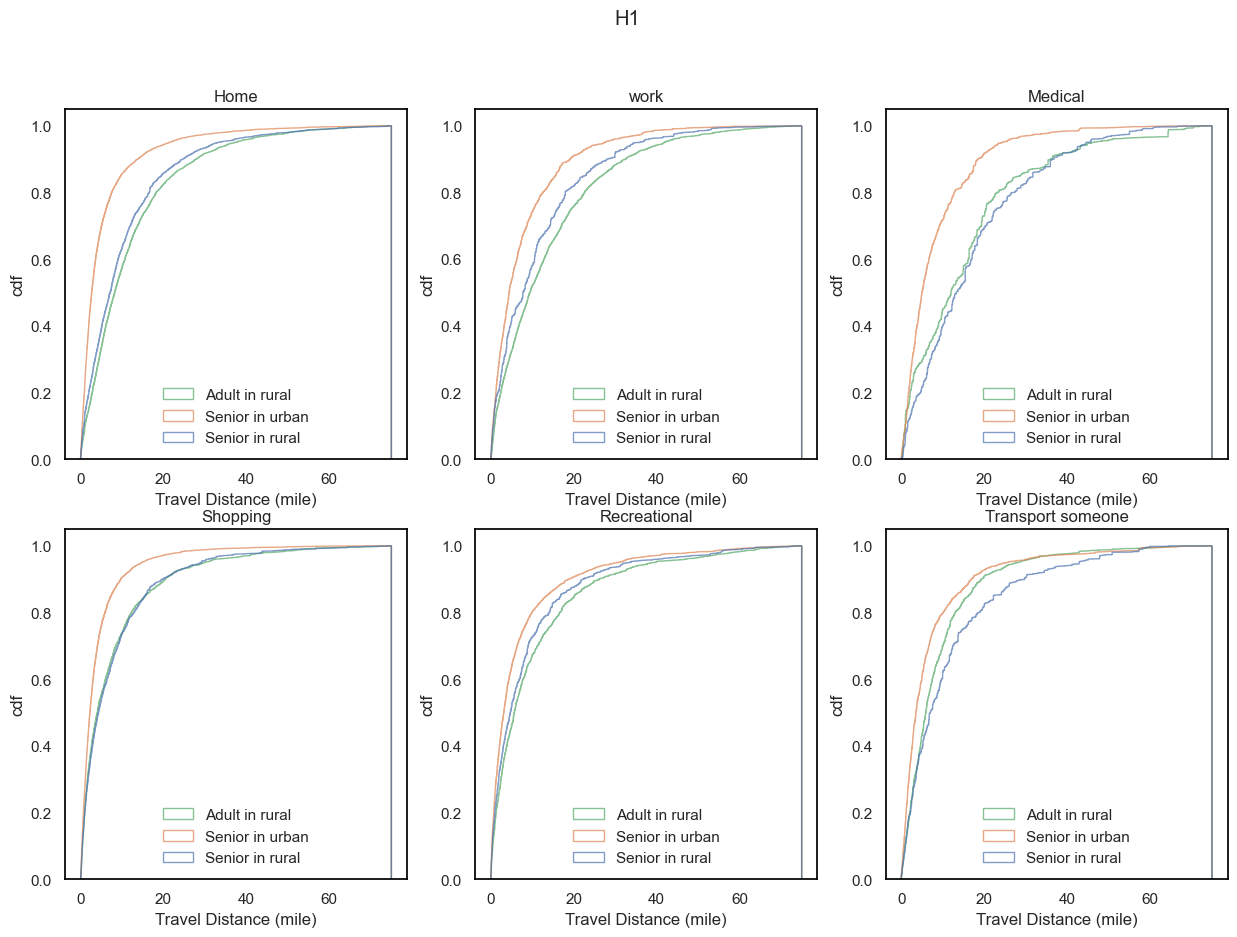

In [67]:
plt.figure(figsize=(15,10))
plt.tight_layout(pad=4.0)
for i in [1,2,4,5,6,7]:
    df1=af4[(af4['R_AGE_IMP']>=65)&(af4['URBRUR']==2)&(af4['WHYTRP1S']==i)]
    df2=af4[(af4['R_AGE_IMP']>=65)&(af4['URBRUR']==1)&(af4['WHYTRP1S']==i)]
    df3=af4[(af4['R_AGE_IMP']>=16)&(af4['R_AGE_IMP']<65)&(af4['URBRUR']==2)&(af4['WHYTRP1S']==i)]
    data1=df1['TRPMILAD']
    weight1=df1['WTTRDFIN']
    data2=df2['TRPMILAD']
    weight2=df2['WTTRDFIN']
    data3=df3['TRPMILAD']
    weight3=df3['WTTRDFIN']
    data=[data1,data2,data3]
    weight=[weight1,weight2,weight3]
    label1=['Senior in rural','Senior in urban','Adult in rural']
    title=['Home','work','School','Medical','Shopping','Recreational','Transport someone','meals','others']
    ax = plt.gca()  # Get the current axes
    ax.set_facecolor('white')
    ax.spines['left'].set_color('black')     # Set the line width for the top spine
    ax.spines['top'].set_color('black')     # Set the color for the top spine
    ax.spines['bottom'].set_color('black')  # Set the line width for the bottom spine
    ax.spines['right'].set_color('black')# Set the color for the bottom spine
    if i<3:
        plt.subplot(2,3,i)
        plt.hist(data, bins=5000, density=True,range=(0,75), cumulative= True, label=label1,alpha=0.7,histtype='step',weights=weight)
        plt.xlabel('Travel Distance (mile)')
        plt.ylabel('cdf')
        plt.title(title[i-1]) 
        ax = plt.gca()  # Get the current axes
        ax.set_facecolor('white')
        plt.legend(facecolor='white',edgecolor='white')
        plt.grid(False)
    else:
        plt.subplot(2,3,i-1)
        plt.hist(data, bins=5000, density=True,range=(0,75), cumulative= True, label=label1,alpha=0.7,histtype='step',weights=weight)
        plt.xlabel('Travel Distance (mile)')
        plt.ylabel('cdf')
        ax = plt.gca()  # Get the current axes
        ax.set_facecolor('white')
        plt.title(title[i-1])
        plt.legend(facecolor='white',edgecolor='white')
        plt.grid(False)
        ax = plt.gca()  # Get the current axes
        ax.set_facecolor('white')
        ax.spines['left'].set_color('black')     # Set the line width for the top spine
        ax.spines['top'].set_color('black')     # Set the color for the top spine
        ax.spines['bottom'].set_color('black')  # Set the line width for the bottom spine
        ax.spines['right'].set_color('black')# Set the color for the bottom spine
plt.suptitle('H1')



C:\Users\KeLi2\AppData\Local\Temp\ipykernel_16664\3050172340.py:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i)


Text(0.5, 0.98, 'H1')

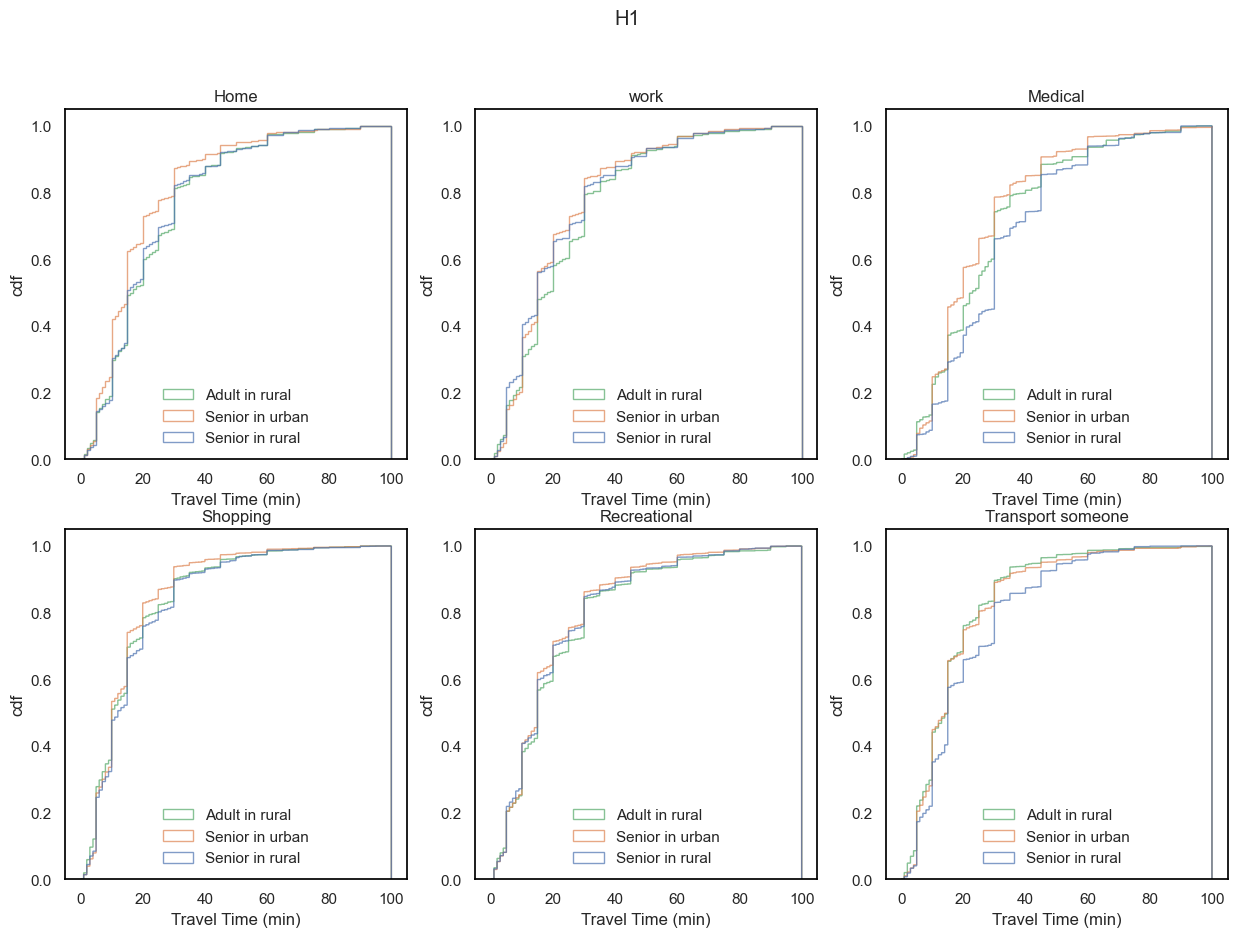

In [68]:
plt.figure(figsize=(15,10))
plt.tight_layout(pad=4.0)
for i in [1,2,4,5,6,7]:
    df1=af4[(af4['R_AGE_IMP']>=65)&(af4['URBRUR']==2)&(af4['WHYTRP1S']==i)]
    df2=af4[(af4['R_AGE_IMP']>=65)&(af4['URBRUR']==1)&(af4['WHYTRP1S']==i)]
    df3=af4[(af4['R_AGE_IMP']>=16)&(af4['R_AGE_IMP']<65)&(af4['URBRUR']==2)&(af4['WHYTRP1S']==i)]
    data4=df1['TRVLCMIN']
    weight4=df1['WTTRDFIN']
    data5=df2['TRVLCMIN']
    weight5=df2['WTTRDFIN']
    data6=df3['TRVLCMIN']
    weight6=df3['WTTRDFIN']
    dataT=[data4,data5,data6]
    weightT=[weight4,weight5,weight6]
    label1=['Senior in rural','Senior in urban','Adult in rural']
    title=['Home','work','School','Medical','Shopping','Recreational','Transport someone','meals','others']
    ax = plt.gca()  # Get the current axes
    ax.set_facecolor('white')
    ax.spines['left'].set_color('black')     # Set the line width for the top spine
    ax.spines['top'].set_color('black')     # Set the color for the top spine
    ax.spines['bottom'].set_color('black')  # Set the line width for the bottom spine
    ax.spines['right'].set_color('black')# Set the color for the bottom spine
    if i<3:
        plt.subplot(2,3,i)
        plt.hist(dataT, bins=100, density=True,range=(0,100), cumulative= True, label=label1,alpha=0.7,histtype='step',weights=weightT)
        plt.xlabel('Travel Time (min)')
        plt.ylabel('cdf')
        plt.title(title[i-1])
        plt.legend(facecolor='white',edgecolor='white')
        plt.grid(False)
    else:
        plt.subplot(2,3,i-1)
        plt.hist(dataT, bins=5000, density=True,range=(0,100), cumulative= True, label=label1,alpha=0.7,histtype='step',weights=weightT)
        plt.xlabel('Travel Time (min)')
        plt.ylabel('cdf')
        plt.title(title[i-1])
        ax = plt.gca()
        ax.set_facecolor('white')
        ax.spines['left'].set_color('black')     # Set the line width for the top spine
        ax.spines['top'].set_color('black')     # Set the color for the top spine
        ax.spines['bottom'].set_color('black')  # Set the line width for the bottom spine
        ax.spines['right'].set_color('black')# Set the color for the bottom spine
        plt.legend(facecolor='white',edgecolor='white')
        plt.grid(False)
plt.suptitle('H1')
    